In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from itertools import combinations

plt.style.use('seaborn-whitegrid')


# Урок 7. Многомерный статистический анализ. Линейная регрессия


__Задача 1__

Дана матрица объект-признак

X = [[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],

[-0.18757272, 1.30337355, 5.12093014, 3.46363202],

[-0.81094525, 1.82463398, 5.79686488, 1.86159445],

[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],

[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],

[-0.62972637, 0.77750764, 2.84124027, 4.54410559],

[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],

[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],

[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],

[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]]

и значения целевой переменной

y = [ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108, 7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218]

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. Является ли значимым получившееся уравнение регрессии?

In [4]:
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]


y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

In [7]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((10, 4), (10,))

# Для каждой пары фактор наду будет посчитать линейную регрессию которая будет считать переменую y
в нашем случае лучшую пару факторов мы будем выбирать опиараясь на оценку R2

будем использовать по порядку следущее формулы 

Коэфициент линейной регрессии
$$b = (X^\top X)^{-1} X^\top y.$$

Значения в предсказание модели
$$ z = X*b$$

массив ошибок E

$$ E = y-z$$


Выше взяты формулы потм используется в R2

$$R^2 = 1 - \dfrac{\sigma^2_{res}}{\sigma^2_{y}}$$





Создаём функцию для подсчёта R2

In [33]:
def R2_function(x:np.ndarray, y:np.ndarray):
    
    ones = np.ones((x.shape[0],1))
    x = np.hstack([ones,x])
    
    XTX = x.T.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    
    b = XTX_inv.dot(x.T).dot(y)
    
    z = x.dot(b)
    
    E = y - z
    
    return 1 - E.var() / y.var()

In [42]:
# Dimension
X.shape[0], X.shape[1]
list(range(X.shape[1]))

[0, 1, 2, 3]

C помощью функции посчитаем комбинцаию __$C_4^2$__  для выбора оптимальной пары опираясь на показателя __R2__

In [45]:
# X[:..]  we want all rows

for i, j in combinations([0,1,2,3],2):
    R2 = R2_function(X[:, [i,j] ], y)
    
    print(f'{i} \t{j} \t{R2}') 

0 	1 	0.18113594742585204
0 	2 	0.7634246238793152
0 	3 	0.45329667831440745
1 	2 	0.5479482734039011
1 	3 	0.6062055761129932
2 	3 	0.6224419876505322


Лучшая пара (0,2) c R2 =  0.76

Воспользуемся тестом F-тест Фишера. чтобы показать значимость линейной зависимости в регресии

$$F = \dfrac{R^2 / k}{(1 - R^2) / (n - k - 1)},$$

* k число факторов
* n - число наблюдений(строк)

состоит из двух факторов(0,2)

In [51]:
k1 = 2
k2 = X.shape[0] - 2 - 1

R = R2_function(X[:,[0,2] ], y) #лучшая пара (0,2)
F = (R/k1) / ((1-R)/k2)

F


11.29443912292265

Использум alpha = 5% для построения критической области для распределения Фишера

In [56]:
alpha = 0.05

t = stats.f.ppf(1 -alpha, k1, k2)
t

4.73741412777588

F > t F попадает в критическую область значит линейная регрессия признается

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница A была посещена 2509 раз, из них 77 закончились совершением покупки, страница B была посещена 1465 раз, 60 из них закончились совершением покупки.

Является ли значимым отличие конверсии на страницах A и B?

Для решение используем однофакторный дисперсионый анализ
(1 - покупки , 0- нет покупок)

In [86]:
y1 = np.zeros(2509)  # 2509 нулей
y1[np.arange(77)] = 1  # для первыъх 77 элементов поставим 1

y2 = np.zeros(1465)  # 
y2[np.arange(60)] = 1 

y = np.concatenate([y1,y2])

n1 = y1.shape[0]    # 2509 наблюденей
n2 = y2.shape[0]    # 2509 наблюдений

In [87]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y_mean = y.mean()

y1_mean, y2_mean, y_mean

(0.03068951773614986, 0.040955631399317405, 0.03447408152994464)

$$ SS_b = \displaystyle\sum_{i=1}^k (\overline{y}_i - \overline{y})^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} (y_{ij} - \overline{y}_i)^2$$

In [90]:
SS_b = n1 *(y1_mean - y_mean)**2 + n2 * (y2_mean - y_mean)**2

SS_w = ((y1 - y1_mean)**2).sum() + ((y2 - y2_mean)**2).sum()

SS_b, SS_w 

(0.09748158004016791, 132.17956925035745)

Дисперсии $$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

In [96]:
k = 2 

n = n1 + n2

k1 = k - 1
k2 = n- k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.03327783717279895)

статистика $$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

In [100]:
F = sigma2_b / sigma2_w
F

2.9293243889013496

Использум alpha = 5% для построения критической области для распределения Фишера

In [101]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

В однофакторном дисперсионом анализе нулевая Гипотеза $H_0$:  утверждает что что отличий между у __А__ и __B__ нет так как средние у них одинаковые

F < t  а значит Отличие страниц А и В незначительно

__Задача 3__

Квартет Энскомба — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

In [5]:

df = pd.DataFrame({
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
})

In [22]:
for i in range(1,5):
    
    x = 'x' + str(i)
    y = 'y' + str(i)
    
    print('Выборки', i)
    print('Выброчные средние', df[x].mean(), df[y].mean())
    print('Выброчные дисперсии', df[x].var(), df[y].var())
    print('Коэф. корр. Пирсона', np.corrcoef(df[x], df[y])[0, 1], "\n")

Выборки 1
Выброчные средние 9.0 7.500909090909093
Выброчные дисперсии 11.0 4.127269090909091
Коэф. корр. Пирсона 0.81642051634484 

Выборки 2
Выброчные средние 9.0 7.500909090909091
Выброчные дисперсии 11.0 4.127629090909091
Коэф. корр. Пирсона 0.8162365060002428 

Выборки 3
Выброчные средние 9.0 7.500000000000001
Выброчные дисперсии 11.0 4.12262
Коэф. корр. Пирсона 0.8162867394895984 

Выборки 4
Выброчные средние 9.0 7.50090909090909
Выброчные дисперсии 11.0 4.12324909090909
Коэф. корр. Пирсона 0.8165214368885028 



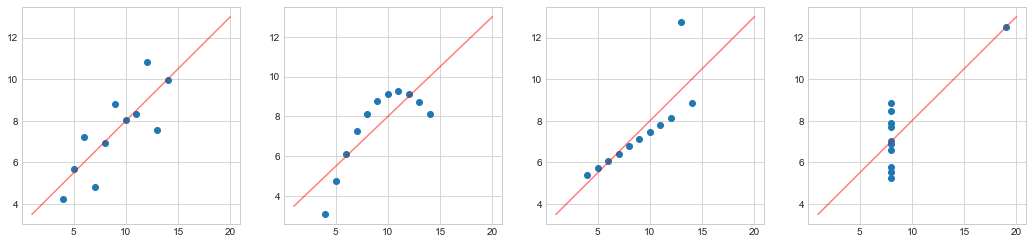

In [23]:

cov_matrix = df[['x1', 'y1']].cov()                     # to keep the same line use x1 and y1 for all 4 examples
coeff = cov_matrix['x1']['y1']
b1 = cov_matrix['x1']['y1']/cov_matrix['x1']['x1']
b0 = df['y1'].mean() - b1 * df['x1'].mean()



fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(18, 4)

x = np.linspace(1, 20, 20)

ax1.scatter(df['x1'], df['y1'])
ax1.plot(x, b0 + b1 * x, color='red', alpha=0.5)

ax2.scatter(df['x2'], df['y2'])
ax2.plot(x, b0 + b1 * x, color='red', alpha=0.5)

ax3.scatter(df['x3'], df['y3'])
ax3.plot(x, b0 + b1 * x, color='red', alpha=0.5)

ax4.scatter(df['x4'], df['y4'])
ax4.plot(x, b0 + b1 * x, color='red', alpha=0.5)

plt.show()